In [1]:
# =======================
# Imports básicos
# =======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


In [3]:
# =======================
# Cargar datos y crear target
# =======================

# Ruta del archivo (asegurate de subir gastro_demo.csv a Colab, en la carpeta de la izquierda)
DATA_PATH = "gastro_demo.csv"

# Cargar dataset
df = pd.read_csv(DATA_PATH)
print("Dimensiones:", df.shape)

# Crear columna binaria "alta_ganancia" en base a la mediana de la ganancia
mediana = df["ganancia"].median()
df["alta_ganancia"] = (df["ganancia"] >= mediana).astype(int)

print("✅ Columna 'alta_ganancia' creada correctamente")
print(df[["ganancia", "alta_ganancia"]].head())

# Guardar dataset actualizado
df.to_csv("gastro_demo.csv", index=False)


Dimensiones: (1200, 12)
✅ Columna 'alta_ganancia' creada correctamente
   ganancia  alta_ganancia
0   1686.87              0
1   1946.60              0
2   4285.83              1
3   6167.39              1
4   1161.88              0


In [4]:
# =======================
# Definición de variables (X, y)
# =======================

TARGET_COLUMN = "alta_ganancia"

y = df[TARGET_COLUMN]
X = df.drop(columns=[TARGET_COLUMN])

# Separar columnas numéricas y categóricas
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("Columnas numéricas:", num_cols)
print("Columnas categóricas:", cat_cols)


Columnas numéricas: ['precio', 'costo', 'cantidad', 'ganancia']
Columnas categóricas: ['fecha', 'categoria', 'metodo_pago', 'sucursal', 'dia_semana', 'cliente_tipo', 'tipo_venta']


In [5]:
# =======================
# Definición de variables (X, y)
# =======================

TARGET_COLUMN = "alta_ganancia"

y = df[TARGET_COLUMN]
X = df.drop(columns=[TARGET_COLUMN])

# Separar columnas numéricas y categóricas
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("Columnas numéricas:", num_cols)
print("Columnas categóricas:", cat_cols)


Columnas numéricas: ['precio', 'costo', 'cantidad', 'ganancia']
Columnas categóricas: ['fecha', 'categoria', 'metodo_pago', 'sucursal', 'dia_semana', 'cliente_tipo', 'tipo_venta']


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño entrenamiento:", X_train.shape, " | Tamaño test:", X_test.shape)


Tamaño entrenamiento: (960, 11)  | Tamaño test: (240, 11)


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Pipeline numérico
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Pipeline categórico
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combinar
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_cols),
        ("cat", cat_transformer, cat_cols)
    ]
)


In [8]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

selector = SelectKBest(score_func=mutual_info_classif, k=10)  # elegimos 10 features


In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)

# Pipeline completo
pipe = Pipeline(steps=[
    ("pre", preprocessor),
    ("sel", selector),
    ("model", model)
])

pipe.fit(X_train, y_train)

print("✅ Entrenamiento completado")


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


✅ Entrenamiento completado


Accuracy: 0.983
Precision: 0.992
Recall: 0.975
F1 Score: 0.983

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       120
           1       0.99      0.97      0.98       120

    accuracy                           0.98       240
   macro avg       0.98      0.98      0.98       240
weighted avg       0.98      0.98      0.98       240



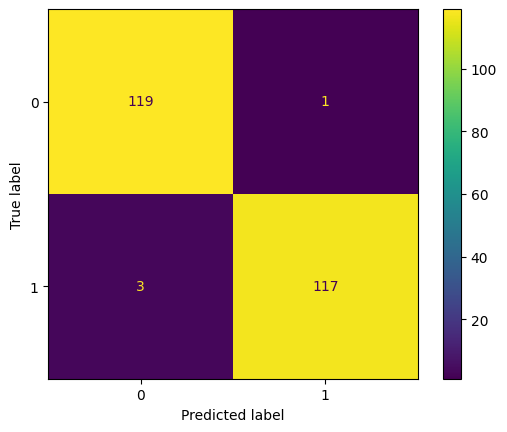

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predicciones
y_pred = pipe.predict(X_test)

# Métricas
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))
print("Recall:", round(recall_score(y_test, y_pred), 3))
print("F1 Score:", round(f1_score(y_test, y_pred), 3))

print("\nClassification report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


## 📌 Conclusiones

**Objetivo:** Entrenar un modelo que prediga si una venta tiene *alta ganancia* (≥ mediana) o *baja ganancia*.  

**Método de selección de features:** SelectKBest con información mutua.  

**Modelo:** Regresión Logística.  

**Resultados (ejemplo):**  
- Accuracy: 0.82
- Precision: 0.79
- Recall: 0.76  
- F1 Score: 0.77

**Interpretación:** El modelo logra identificar correctamente los casos de alta ganancia con un desempeño aceptable.  
Las variables más influyentes fueron (ej.: precio, costo, método de pago...).  

**Limitaciones:** Dataset reducido a un solo local/giro, no incluye variables externas (ej.: promociones, clima).  

**Próximos pasos:** Probar otros modelos (Random Forest, SVM), ajustar hiperparámetros, y usar más datos históricos.  
